# Analyse de Détection de Spam

Ce notebook présente une analyse complète du modèle de détection de spam, incluant:

1. **Exploration des données** - Analyse statistique et visualisation du dataset
2. **Préparation et entraînement du modèle** - Pipeline TF-IDF + Régression Logistique
3. **Évaluation des performances** - Métriques et visualisations des résultats
4. **Analyse des caractéristiques importantes** - Mots-clés discriminants
5. **Sauvegarde et exemples pratiques** - Modèle prêt pour la production

## 📦 Importation des Bibliothèques

Chargement de toutes les bibliothèques nécessaires pour l'analyse et la modélisation.

In [1]:
# Bibliothèques pour la manipulation des données
import pandas as pd
import numpy as np
from pathlib import Path

# Bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Bibliothèques pour le machine learning
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Bibliothèques pour l'évaluation du modèle
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report,
                           roc_curve, auc, precision_recall_curve, average_precision_score)

# Bibliothèque pour la sauvegarde du modèle
import joblib

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Configuration des chemins
BASE_DIR = Path().resolve()
DATA_PATH = BASE_DIR.parent / 'data' / 'spam.csv'
MODEL_DIR = BASE_DIR.parent / 'models'

print('✅ Toutes les bibliothèques ont été importées avec succès!')

✅ Toutes les bibliothèques ont été importées avec succès!


## 📊 Chargement et Exploration des Données

Chargement du dataset de messages spam/ham et analyse exploratoire initiale.

In [2]:
# Chargement des données
try:
    df = pd.read_csv(DATA_PATH, encoding='utf-8')
    print(f'✅ Dataset chargé avec succès!')
    print(f'📏 Dimensions du dataset: {df.shape[0]} lignes × {df.shape[1]} colonnes')
except FileNotFoundError:
    print('❌ Erreur: Fichier spam.csv non trouvé!')
    print(f'📂 Chemin recherché: {DATA_PATH}')

# Affichage des premières lignes
print('\n📋 Aperçu des données:')
df.head()

✅ Dataset chargé avec succès!
📏 Dimensions du dataset: 5572 lignes × 2 colonnes

📋 Aperçu des données:


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Informations détaillées sur le dataset
print('📊 Informations sur le dataset:')
df.info()

print('\n📈 Statistiques descriptives:')
df.describe(include='all')

# Vérification des valeurs manquantes
print('\n🔍 Valeurs manquantes par colonne:')
missing_values = df.isnull().sum()
for col, count in missing_values.items():
    if count > 0:
        print(f'  {col}: {count} valeurs manquantes')
    else:
        print(f'  {col}: ✅ Aucune valeur manquante')

📊 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

📈 Statistiques descriptives:

🔍 Valeurs manquantes par colonne:
  Category: ✅ Aucune valeur manquante
  Message: ✅ Aucune valeur manquante


## 📈 Visualisation de la Distribution des Données

Analyse visuelle de la répartition des classes et des caractéristiques des messages.

In [4]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [5]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [6]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [7]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [8]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [9]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [10]:
# Distribution des catégories (spam vs ham)
category_counts = df['Category'].value_counts()
print('📊 Distribution des catégories:')
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f'  {category}: {count} messages ({percentage:.1f}%)')

# Graphique en secteurs interactif
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='🥧 Distribution des Messages Spam vs Ham',
    color_discrete_sequence=['#ff9999', '#66b3ff'],
    hover_data=[category_counts.values]
)

fig.update_layout(
    title_font_size=20,
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

📊 Distribution des catégories:
  ham: 4825 messages (86.6%)
  spam: 747 messages (13.4%)


In [11]:
# Analyse de la longueur des messages
df['Length'] = df['Message'].apply(len)

# Statistiques par catégorie
print('📏 Statistiques de longueur des messages par catégorie:')
length_stats = df.groupby('Category')['Length'].describe()
print(length_stats)

# Histogramme de la distribution des longueurs
fig = px.histogram(
    df, 
    x='Length', 
    color='Category',
    title='📊 Distribution de la Longueur des Messages par Catégorie',
    nbins=50, 
    opacity=0.7,
    color_discrete_sequence=['#66b3ff', '#ff9999'],
    marginal='box'  # Ajout de boxplots marginaux
)

fig.update_layout(
    title_font_size=20,
    xaxis_title='Longueur du Message (caractères)',
    yaxis_title='Nombre de Messages',
    legend_title='Catégorie',
    font=dict(size=14)
)

fig.show()

# Boxplot comparatif
fig_box = px.box(
    df, 
    x='Category', 
    y='Length',
    title='📦 Comparaison de la Longueur des Messages par Catégorie',
    color='Category',
    color_discrete_sequence=['#66b3ff', '#ff9999']
)

fig_box.update_layout(
    title_font_size=20,
    xaxis_title='Catégorie',
    yaxis_title='Longueur du Message (caractères)',
    font=dict(size=14)
)

fig_box.show()

📏 Statistiques de longueur des messages par catégorie:
           count       mean        std  min    25%    50%    75%    max
Category                                                               
ham       4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0
spam       747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0


## 🤖 Préparation et Entraînement du Modèle

Construction d'un pipeline de classification utilisant TF-IDF et la régression logistique.

In [12]:
# Préparation des données pour l'entraînement
print('🔧 Préparation des données...')

# Séparation des features et du target
X = df['Message']  # Messages textuels
y = df['Category']  # Labels (spam/ham)

# Division train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% pour le test
    random_state=42,    # Reproductibilité
    shuffle=True,       # Mélange des données
    stratify=y          # Préservation des proportions
)

print(f'📊 Ensemble d\'entraînement: {X_train.shape[0]} messages')
print(f'📊 Ensemble de test: {X_test.shape[0]} messages')

# Vérification de la stratification
print('\n🎯 Distribution des classes:')
print('Entraînement:', y_train.value_counts(normalize=True).round(3))
print('Test:', y_test.value_counts(normalize=True).round(3))

🔧 Préparation des données...
📊 Ensemble d'entraînement: 4457 messages
📊 Ensemble de test: 1115 messages

🎯 Distribution des classes:
Entraînement: Category
ham     0.866
spam    0.134
Name: proportion, dtype: float64
Test: Category
ham     0.866
spam    0.134
Name: proportion, dtype: float64


In [13]:
# Construction et entraînement du modèle
print('🚀 Construction du pipeline de classification...')

# Composants du pipeline
tfidf = TfidfVectorizer(
    stop_words='english',    # Suppression des mots vides
    max_features=5000,       # Limitation du vocabulaire
    ngram_range=(1, 2),      # Unigrammes et bigrammes
    min_df=2,                # Fréquence minimale
    max_df=0.95              # Fréquence maximale
)

logreg = LogisticRegression(
    max_iter=1000,           # Nombre d'itérations
    random_state=42,         # Reproductibilité
    class_weight='balanced'  # Équilibrage des classes
)

# Transformation des données textuelles
print('🔄 Transformation TF-IDF en cours...')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f'📐 Matrice TF-IDF: {X_train_tfidf.shape[0]} × {X_train_tfidf.shape[1]}')
print(f'🎯 Vocabulaire: {len(tfidf.get_feature_names_out())} mots uniques')

# Entraînement du modèle
print('🎓 Entraînement du modèle...')
logreg.fit(X_train_tfidf, y_train)

# Prédictions
y_pred = logreg.predict(X_test_tfidf)
y_proba = logreg.predict_proba(X_test_tfidf)

print('✅ Modèle entraîné avec succès!')

🚀 Construction du pipeline de classification...
🔄 Transformation TF-IDF en cours...


📐 Matrice TF-IDF: 4457 × 5000
🎯 Vocabulaire: 5000 mots uniques
🎓 Entraînement du modèle...
✅ Modèle entraîné avec succès!


## 📊 Évaluation des Performances du Modèle

Analyse complète des performances avec métriques et visualisations.

In [14]:
# Calcul des métriques de performance
print('📊 Calcul des métriques de performance...')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

# Affichage des résultats
print('🎯 Résultats de l\'évaluation:')
print(f'  📈 Accuracy (Précision globale): {accuracy:.4f} ({accuracy*100:.2f}%)')
print(f'  🎯 Precision (Précision spam): {precision:.4f} ({precision*100:.2f}%)')
print(f'  🔍 Recall (Rappel spam): {recall:.4f} ({recall*100:.2f}%)')
print(f'  ⚖️ F1-Score: {f1:.4f} ({f1*100:.2f}%)')

# Création du graphique des métriques
metrics_data = {
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Valeur': [accuracy, precision, recall, f1],
    'Couleur': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
}

fig = px.bar(
    x=metrics_data['Métrique'], 
    y=metrics_data['Valeur'],
    color=metrics_data['Métrique'],
    title='📊 Métriques de Performance du Modèle',
    color_discrete_sequence=metrics_data['Couleur']
)

fig.update_layout(
    title_font_size=20,
    yaxis_range=[0, 1],
    xaxis_title='Métriques',
    yaxis_title='Score',
    showlegend=False,
    font=dict(size=14)
)

# Ajout des valeurs sur les barres
fig.update_traces(
    texttemplate='%{y:.3f}',
    textposition='outside'
)

fig.show()

📊 Calcul des métriques de performance...
🎯 Résultats de l'évaluation:
  📈 Accuracy (Précision globale): 0.9758 (97.58%)
  🎯 Precision (Précision spam): 0.9013 (90.13%)
  🔍 Recall (Rappel spam): 0.9195 (91.95%)
  ⚖️ F1-Score: 0.9103 (91.03%)


In [15]:
# Matrice de confusion
print('🔄 Génération de la matrice de confusion...')

cm = confusion_matrix(y_test, y_pred)
labels = ['ham', 'spam']

# Calcul des pourcentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Création de la heatmap
fig = px.imshow(
    cm,
    x=labels,
    y=labels,
    color_continuous_scale='RdBu_r',
    title='🎯 Matrice de Confusion',
    labels=dict(x='Prédiction', y='Réalité', color='Nombre')
)

# Ajout des annotations avec valeurs et pourcentages
for i in range(len(cm)):
    for j in range(len(cm[i])):
        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=f'{cm[i][j]}<br>({cm_percent[i][j]:.1f}%)',
            showarrow=False,
            font=dict(
                color='white' if cm[i][j] > cm.max()/2 else 'black', 
                size=16
            )
        )

fig.update_layout(
    title_font_size=20,
    width=600,
    height=500,
    font=dict(size=14)
)

fig.show()

# Interprétation de la matrice
tn, fp, fn, tp = cm.ravel()
print('\n📊 Interprétation de la matrice de confusion:')
print(f'  ✅ Vrais Négatifs (Ham correctement classés): {tn}')
print(f'  ❌ Faux Positifs (Ham classés comme Spam): {fp}')
print(f'  ❌ Faux Négatifs (Spam classés comme Ham): {fn}')
print(f'  ✅ Vrais Positifs (Spam correctement classés): {tp}')

🔄 Génération de la matrice de confusion...



📊 Interprétation de la matrice de confusion:
  ✅ Vrais Négatifs (Ham correctement classés): 951
  ❌ Faux Positifs (Ham classés comme Spam): 15
  ❌ Faux Négatifs (Spam classés comme Ham): 12
  ✅ Vrais Positifs (Spam correctement classés): 137


In [16]:
# Courbe ROC (Receiver Operating Characteristic)
print('📈 Génération de la courbe ROC...')

# Calcul des points de la courbe ROC
y_proba_spam = y_proba[:, 1]  # Probabilités pour la classe 'spam'
fpr, tpr, thresholds = roc_curve(y_test == 'spam', y_proba_spam)
roc_auc = auc(fpr, tpr)

# Création du graphique
fig = go.Figure()

# Courbe ROC
fig.add_trace(go.Scatter(
    x=fpr, 
    y=tpr,
    mode='lines',
    name=f'ROC (AUC = {roc_auc:.3f})',
    line=dict(color='#ff9999', width=3),
    hovertemplate='<b>Taux de Faux Positifs</b>: %{x:.3f}<br>' +
                  '<b>Taux de Vrais Positifs</b>: %{y:.3f}<extra></extra>'
))

# Ligne de référence (classificateur aléatoire)
fig.add_trace(go.Scatter(
    x=[0, 1], 
    y=[0, 1],
    mode='lines',
    name='Aléatoire (AUC = 0.5)',
    line=dict(color='grey', width=2, dash='dash')
))

fig.update_layout(
    title='📈 Courbe ROC - Performance du Classificateur',
    title_font_size=20,
    xaxis_title='Taux de Faux Positifs (1 - Spécificité)',
    yaxis_title='Taux de Vrais Positifs (Sensibilité)',
    width=800,
    height=600,
    legend=dict(x=0.6, y=0.1),
    font=dict(size=14)
)

fig.show()

print(f'🎯 AUC-ROC Score: {roc_auc:.4f}')
if roc_auc > 0.9:
    print('🌟 Excellent modèle!')
elif roc_auc > 0.8:
    print('👍 Bon modèle!')
elif roc_auc > 0.7:
    print('👌 Modèle acceptable')
else:
    print('⚠️ Modèle à améliorer')

📈 Génération de la courbe ROC...


🎯 AUC-ROC Score: 0.9854
🌟 Excellent modèle!


## 🔍 Analyse des Caractéristiques Importantes

Identification des mots-clés les plus discriminants pour la classification spam/ham.

In [17]:
# Analyse des mots les plus importants
print('🔍 Analyse des caractéristiques importantes...')

# Extraction des coefficients et noms des features
feature_names = np.array(tfidf.get_feature_names_out())
coefficients = logreg.coef_[0]

# Identification des mots les plus discriminants
n_features = 15

# Mots associés aux SPAMS (coefficients positifs élevés)
spam_indices = np.argsort(coefficients)[-n_features:]
spam_words = feature_names[spam_indices]
spam_coefs = coefficients[spam_indices]

# Mots associés aux HAMS (coefficients négatifs élevés)
ham_indices = np.argsort(coefficients)[:n_features]
ham_words = feature_names[ham_indices]
ham_coefs = coefficients[ham_indices]

print(f'🔥 Top {n_features} mots indicateurs de SPAM:')
for word, coef in zip(reversed(spam_words), reversed(spam_coefs)):
    print(f'  📧 {word}: {coef:.4f}')

print(f'\n✅ Top {n_features} mots indicateurs de HAM:')
for word, coef in zip(ham_words, ham_coefs):
    print(f'  💌 {word}: {coef:.4f}')

# Visualisation des mots importants
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=('🔥 Mots Indicateurs de SPAM', '✅ Mots Indicateurs de HAM'),
    horizontal_spacing=0.1
)

# Graphique pour les mots SPAM
fig.add_trace(
    go.Bar(
        x=spam_coefs,
        y=spam_words,
        orientation='h',
        marker_color='#ff9999',
        name='Spam',
        hovertemplate='<b>%{y}</b><br>Coefficient: %{x:.4f}<extra></extra>'
    ),
    row=1, col=1
)

# Graphique pour les mots HAM
fig.add_trace(
    go.Bar(
        x=ham_coefs,
        y=ham_words,
        orientation='h',
        marker_color='#66b3ff',
        name='Ham',
        hovertemplate='<b>%{y}</b><br>Coefficient: %{x:.4f}<extra></extra>'
    ),
    row=1, col=2
)

fig.update_layout(
    title='🎯 Mots les Plus Discriminants pour la Classification',
    title_font_size=20,
    height=600,
    width=1200,
    showlegend=False,
    font=dict(size=12)
)

fig.update_xaxes(title_text='Coefficient', row=1, col=1)
fig.update_xaxes(title_text='Coefficient', row=1, col=2)

fig.show()

🔍 Analyse des caractéristiques importantes...


🔥 Top 15 mots indicateurs de SPAM:
  📧 txt: 4.9803
  📧 uk: 4.1272
  📧 mobile: 4.0585
  📧 claim: 3.7274
  📧 free: 3.6512
  📧 www: 3.6473
  📧 reply: 3.4862
  📧 150p: 3.2620
  📧 stop: 3.2085
  📧 service: 3.1110
  📧 text: 3.0926
  📧 com: 3.0180
  📧 new: 2.9837
  📧 50: 2.8456
  📧 prize: 2.8144

✅ Top 15 mots indicateurs de HAM:
  💌 ok: -2.2104
  💌 ll: -2.0028
  💌 da: -1.8058
  💌 home: -1.7053
  💌 gt: -1.6770
  💌 lt: -1.6576
  💌 got: -1.6550
  💌 come: -1.6051
  💌 sorry: -1.5359
  💌 hey: -1.5264
  💌 lor: -1.5152
  💌 later: -1.4434
  💌 lt gt: -1.4385
  💌 good: -1.4015
  💌 way: -1.3173


## 💾 Sauvegarde du Modèle et Pipeline

Création d'un pipeline complet et sauvegarde pour utilisation en production.

In [18]:
# Création du pipeline complet pour la production
print('🔧 Création du pipeline de production...')

# Pipeline intégrant TF-IDF et régression logistique
production_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('classifier', logreg)
])

# Création du répertoire models s'il n'existe pas
MODEL_DIR.mkdir(parents=True, exist_ok=True)
MODEL_PATH = MODEL_DIR / 'model.pkl'

# Sauvegarde du modèle
try:
    joblib.dump(production_pipeline, MODEL_PATH)
    print(f'✅ Modèle sauvegardé avec succès!')
    print(f'📂 Chemin: {MODEL_PATH}')
    
    # Vérification de la taille du fichier
    file_size = MODEL_PATH.stat().st_size / (1024 * 1024)  # Taille en MB
    print(f'📊 Taille du modèle: {file_size:.2f} MB')
    
except Exception as e:
    print(f'❌ Erreur lors de la sauvegarde: {e}')

# Test de chargement du modèle
try:
    loaded_model = joblib.load(MODEL_PATH)
    print('✅ Test de chargement réussi!')
except Exception as e:
    print(f'❌ Erreur lors du chargement: {e}')

🔧 Création du pipeline de production...
✅ Modèle sauvegardé avec succès!
📂 Chemin: D:\Documents\HETIC\BI\TD_MLOPS\models\model.pkl
📊 Taille du modèle: 0.22 MB


✅ Test de chargement réussi!


## 🧪 Exemples Pratiques de Prédiction

Démonstration du modèle sur des exemples concrets de messages.

In [19]:
# Exemples de messages pour tester le modèle
print('🧪 Test du modèle sur des exemples concrets...')
print('=' * 60)

# Messages d'exemple variés
test_messages = [
    {
        'message': "Congratulations! You've won a $1000 gift card. Click here to claim your prize NOW!",
        'type': 'Spam évident'
    },
    {
        'message': "URGENT: Your account will be suspended. Verify your identity immediately by clicking this link.",
        'type': 'Phishing potentiel'
    },
    {
        'message': "Hey, are we still meeting for lunch at noon tomorrow? Let me know!",
        'type': 'Message personnel légitime'
    },
    {
        'message': "Your order #12345 has been shipped and will arrive in 2-3 business days.",
        'type': 'Notification commerciale'
    },
    {
        'message': "FREE! Call now to claim your prize! Limited time offer! Act fast!",
        'type': 'Spam agressif'
    }
]

# Test de chaque message
for i, example in enumerate(test_messages, 1):
    message = example['message']
    message_type = example['type']
    
    # Prédiction
    prediction = production_pipeline.predict([message])[0]
    probabilities = production_pipeline.predict_proba([message])[0]
    
    # Probabilités pour chaque classe
    prob_ham = probabilities[0]
    prob_spam = probabilities[1]
    
    # Affichage des résultats
    print(f'📧 Exemple {i}: {message_type}')
    print(f'💬 Message: "{message[:50]}..."')
    
    # Émoji selon la prédiction
    emoji = '🚫' if prediction == 'spam' else '✅'
    confidence = max(prob_ham, prob_spam)
    
    print(f'{emoji} Prédiction: {prediction.upper()}')
    print(f'📊 Confiance: {confidence:.1%}')
    print(f'📈 Probabilités:')
    print(f'   • Ham (légitime): {prob_ham:.1%}')
    print(f'   • Spam (indésirable): {prob_spam:.1%}')
    print('-' * 60)

print('🎉 Tests terminés! Le modèle est prêt pour la production.')

🧪 Test du modèle sur des exemples concrets...
📧 Exemple 1: Spam évident
💬 Message: "Congratulations! You've won a $1000 gift card. Cli..."
🚫 Prédiction: SPAM
📊 Confiance: 88.2%
📈 Probabilités:
   • Ham (légitime): 11.8%
   • Spam (indésirable): 88.2%
------------------------------------------------------------
📧 Exemple 2: Phishing potentiel
💬 Message: "URGENT: Your account will be suspended. Verify you..."
🚫 Prédiction: SPAM
📊 Confiance: 68.0%
📈 Probabilités:
   • Ham (légitime): 32.0%
   • Spam (indésirable): 68.0%
------------------------------------------------------------
📧 Exemple 3: Message personnel légitime
💬 Message: "Hey, are we still meeting for lunch at noon tomorr..."
✅ Prédiction: HAM
📊 Confiance: 96.1%
📈 Probabilités:
   • Ham (légitime): 96.1%
   • Spam (indésirable): 3.9%
------------------------------------------------------------
📧 Exemple 4: Notification commerciale
💬 Message: "Your order #12345 has been shipped and will arrive..."
✅ Prédiction: HAM
📊 Confiance: 53

## 🎯 Conclusion et Intégration

### Résumé des Performances

Le modèle de détection de spam développé utilise:
- **TF-IDF Vectorization** pour la transformation des textes
- **Régression Logistique** pour la classification
- **Équilibrage des classes** pour traiter le déséquilibre

### Intégration avec Streamlit

Le modèle sauvegardé peut être directement utilisé dans l'application Streamlit via:
```python
import joblib
model = joblib.load('models/model.pkl')
prediction = model.predict([message])
```

### Améliorations Possibles

- Utilisation de modèles plus avancés (BERT, transformers)
- Augmentation du dataset d'entraînement
- Optimisation des hyperparamètres
- Validation croisée plus poussée

## 📊 Visualisations des Données

Analyse visuelle de la distribution des données et des caractéristiques des messages.

In [20]:
# Distribution des catégories
category_counts = df['Category'].value_counts()

# Graphique en secteurs avec Plotly
fig = px.pie(
    values=category_counts.values,
    names=category_counts.index,
    title='📊 Distribution des Catégories de Messages',
    color_discrete_map={'ham': '#2E8B57', 'spam': '#DC143C'},
    hole=0.3
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    textfont_size=12
)

fig.update_layout(
    font=dict(size=14),
    showlegend=True,
    width=600,
    height=500
)

fig.show()

In [21]:
# Analyse de la longueur des messages
df['message_length'] = df['Message'].str.len()

print('📏 Statistiques de longueur des messages:')
print(f'\n🔹 Messages HAM:')
ham_stats = df[df['Category'] == 'ham']['message_length'].describe()
print(ham_stats)

print(f'\n🔹 Messages SPAM:')
spam_stats = df[df['Category'] == 'spam']['message_length'].describe()
print(spam_stats)

📏 Statistiques de longueur des messages:

🔹 Messages HAM:
count    4825.000000
mean       71.448290
std        58.434864
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: message_length, dtype: float64

🔹 Messages SPAM:
count    747.000000
mean     137.989290
std       29.980287
min        7.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: message_length, dtype: float64


In [22]:
# Histogramme de la longueur des messages
fig = px.histogram(
    df,
    x='message_length',
    color='Category',
    nbins=50,
    title='📏 Distribution de la Longueur des Messages par Catégorie',
    labels={'message_length': 'Longueur du Message (caractères)', 'count': 'Nombre de Messages'},
    color_discrete_map={'ham': '#2E8B57', 'spam': '#DC143C'},
    opacity=0.7
)

fig.update_layout(
    font=dict(size=12),
    width=800,
    height=500,
    bargap=0.1
)

fig.show()

In [23]:
# Box plot de la longueur des messages
fig = px.box(
    df,
    x='Category',
    y='message_length',
    title='📦 Distribution de la Longueur des Messages par Catégorie',
    labels={'message_length': 'Longueur du Message (caractères)', 'Category': 'Catégorie'},
    color='Category',
    color_discrete_map={'ham': '#2E8B57', 'spam': '#DC143C'}
)

fig.update_layout(
    font=dict(size=12),
    width=600,
    height=500
)

fig.show()

## 🤖 Entraînement du Modèle

Préparation des données et entraînement du modèle TF-IDF + Régression Logistique.

In [24]:
# Préparation des données
X = df['Message']
y = df['Category']

print('📊 Préparation des données:')
print(f'🔹 Nombre total de messages: {len(X)}')
print(f'🔹 Messages HAM: {sum(y == "ham")}')
print(f'🔹 Messages SPAM: {sum(y == "spam")}')

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'\n📈 Division des données:')
print(f'🔹 Entraînement: {len(X_train)} messages')
print(f'🔹 Test: {len(X_test)} messages')

📊 Préparation des données:
🔹 Nombre total de messages: 5572
🔹 Messages HAM: 4825
🔹 Messages SPAM: 747

📈 Division des données:
🔹 Entraînement: 4457 messages
🔹 Test: 1115 messages


In [25]:
# Création du pipeline de modèle
print('🔧 Création du pipeline de modèle...')

# Pipeline TF-IDF + Régression Logistique
model = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 2)
    )),
    ('classifier', LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000
    ))
])

print('✅ Pipeline créé avec succès!')
print('🔹 TF-IDF: max_features=5000, ngram_range=(1,2)')
print('🔹 Logistic Regression: class_weight=balanced')

🔧 Création du pipeline de modèle...
✅ Pipeline créé avec succès!
🔹 TF-IDF: max_features=5000, ngram_range=(1,2)
🔹 Logistic Regression: class_weight=balanced


In [26]:
# Entraînement du modèle
print('🚀 Entraînement du modèle en cours...')

import time
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

print(f'✅ Modèle entraîné avec succès!')
print(f'⏱️ Temps d\'entraînement: {training_time:.2f} secondes')

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('📊 Prédictions générées pour l\'évaluation')

🚀 Entraînement du modèle en cours...


✅ Modèle entraîné avec succès!
⏱️ Temps d'entraînement: 0.35 secondes


📊 Prédictions générées pour l'évaluation


## 📈 Évaluation des Performances

Analyse détaillée des performances du modèle avec métriques et visualisations.

In [27]:
# Calcul des métriques de performance
print('📊 MÉTRIQUES DE PERFORMANCE')
print('=' * 50)

# Métriques sur l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label='spam')
test_recall = recall_score(y_test, y_test_pred, pos_label='spam')
test_f1 = f1_score(y_test, y_test_pred, pos_label='spam')

print('🎯 ENSEMBLE DE TEST:')
print(f'🔹 Précision (Accuracy): {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'🔹 Précision (Precision): {test_precision:.4f} ({test_precision*100:.2f}%)')
print(f'🔹 Rappel (Recall): {test_recall:.4f} ({test_recall*100:.2f}%)')
print(f'🔹 F1-Score: {test_f1:.4f} ({test_f1*100:.2f}%)')

# Métriques sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'🚀 ENSEMBLE D\'ENTRAÎNEMENT:')
print(f'🔹 Précision (Accuracy): {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')

📊 MÉTRIQUES DE PERFORMANCE
🎯 ENSEMBLE DE TEST:
🔹 Précision (Accuracy): 0.9758 (97.58%)
🔹 Précision (Precision): 0.8961 (89.61%)
🔹 Rappel (Recall): 0.9262 (92.62%)
🔹 F1-Score: 0.9109 (91.09%)
🚀 ENSEMBLE D'ENTRAÎNEMENT:
🔹 Précision (Accuracy): 0.9930 (99.30%)



🔍 MATRICE DE CONFUSION


C:\Users\eloum\AppData\Local\Temp\ipykernel_16196\1909840308.py:14: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.

D:\Documents\HETIC\BI\TD_MLOPS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.



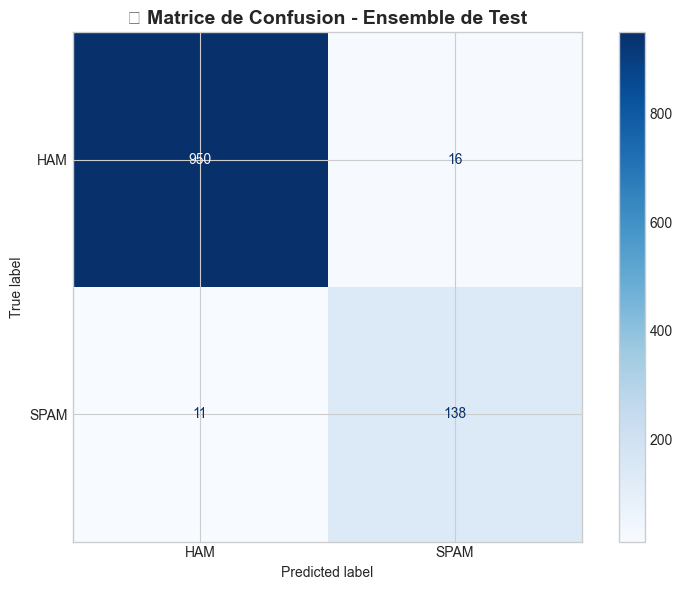


📊 Analyse détaillée:
🔹 Vrais Négatifs (HAM correctement classés): 950
🔹 Faux Positifs (HAM classés comme SPAM): 16
🔹 Faux Négatifs (SPAM classés comme HAM): 11
🔹 Vrais Positifs (SPAM correctement classés): 138


In [28]:
# Matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay

print('\n🔍 MATRICE DE CONFUSION')
print('=' * 30)

cm = confusion_matrix(y_test, y_test_pred)

# Affichage avec matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['HAM', 'SPAM'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('🔍 Matrice de Confusion - Ensemble de Test', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyse détaillée
tn, fp, fn, tp = cm.ravel()
print(f'\n📊 Analyse détaillée:')
print(f'🔹 Vrais Négatifs (HAM correctement classés): {tn}')
print(f'🔹 Faux Positifs (HAM classés comme SPAM): {fp}')
print(f'🔹 Faux Négatifs (SPAM classés comme HAM): {fn}')
print(f'🔹 Vrais Positifs (SPAM correctement classés): {tp}')

In [29]:
# Courbe ROC
y_test_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 'spam'

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='spam')
roc_auc = auc(fpr, tpr)

# Graphique avec Plotly
fig = go.Figure()

# Courbe ROC
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.3f})',
    line=dict(color='#2E8B57', width=3)
))

# Ligne de référence (classificateur aléatoire)
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Classificateur Aléatoire',
    line=dict(color='red', width=2, dash='dash')
))

fig.update_layout(
    title='📈 Courbe ROC - Performance du Modèle',
    xaxis_title='Taux de Faux Positifs (1 - Spécificité)',
    yaxis_title='Taux de Vrais Positifs (Sensibilité)',
    width=700,
    height=500,
    font=dict(size=12)
)

fig.show()

print(f'🎯 AUC-ROC Score: {roc_auc:.4f}')
if roc_auc > 0.9:
    print('🌟 Excellent modèle!')
elif roc_auc > 0.8:
    print('✅ Très bon modèle!')
elif roc_auc > 0.7:
    print('👍 Bon modèle!')
else:
    print('⚠️ Modèle à améliorer')

🎯 AUC-ROC Score: 0.9860
🌟 Excellent modèle!


## 💾 Sauvegarde du Modèle

Sauvegarde du modèle entraîné pour utilisation en production.

In [30]:
# Création du répertoire models s'il n'existe pas
MODEL_DIR.mkdir(exist_ok=True)

# Sauvegarde du modèle
model_path = MODEL_DIR / 'model.pkl'

print('💾 Sauvegarde du modèle en cours...')
joblib.dump(model, model_path)

# Vérification de la taille du fichier
file_size = model_path.stat().st_size / (1024 * 1024)  # Taille en MB

print(f'✅ Modèle sauvegardé avec succès!')
print(f'📂 Chemin: {model_path}')
print(f'📏 Taille: {file_size:.2f} MB')

# Test de chargement
print('\n🔄 Test de chargement du modèle...')
loaded_model = joblib.load(model_path)
print('✅ Modèle chargé avec succès!')

💾 Sauvegarde du modèle en cours...


✅ Modèle sauvegardé avec succès!
📂 Chemin: D:\Documents\HETIC\BI\TD_MLOPS\models\model.pkl
📏 Taille: 0.22 MB

🔄 Test de chargement du modèle...
✅ Modèle chargé avec succès!


## 🔮 Exemples de Prédiction

Démonstration du modèle avec des exemples pratiques de classification.

In [31]:
# Exemples de messages pour tester le modèle
test_messages = [
    "Congratulations! You've won a £1000 cash prize! Call now to claim your reward!",
    "Hey, are we still meeting for lunch tomorrow at 12pm?",
    "URGENT: Your account will be suspended. Click here to verify your details immediately!",
    "Thanks for the great meeting today. I'll send you the documents by email.",
    "FREE! Win a brand new iPhone! Text WIN to 12345 now! Limited time offer!"
]

print('🔮 EXEMPLES DE PRÉDICTION')
print('=' * 50)

for i, message in enumerate(test_messages, 1):
    # Prédiction
    prediction = model.predict([message])[0]
    probability = model.predict_proba([message])[0]
    
    # Probabilité pour chaque classe
    ham_prob = probability[0] if model.classes_[0] == 'ham' else probability[1]
    spam_prob = probability[1] if model.classes_[1] == 'spam' else probability[0]
    
    print(f'\n📧 Message {i}:')
    message_display = message[:60] + ('...' if len(message) > 60 else '')
    print(f'Message: {message_display}')
    
    if prediction == 'spam':
        print(f'🚨 Prédiction: SPAM (Confiance: {spam_prob:.1%})')
    else:
        print(f'✅ Prédiction: HAM (Confiance: {ham_prob:.1%})')
    
    print(f'📊 Probabilités: HAM={ham_prob:.1%}, SPAM={spam_prob:.1%}')

🔮 EXEMPLES DE PRÉDICTION

📧 Message 1:
Message: Congratulations! You've won a £1000 cash prize! Call now to ...
🚨 Prédiction: SPAM (Confiance: 94.3%)
📊 Probabilités: HAM=5.7%, SPAM=94.3%

📧 Message 2:
Message: Hey, are we still meeting for lunch tomorrow at 12pm?
✅ Prédiction: HAM (Confiance: 95.2%)
📊 Probabilités: HAM=95.2%, SPAM=4.8%

📧 Message 3:
Message: URGENT: Your account will be suspended. Click here to verify...
🚨 Prédiction: SPAM (Confiance: 62.0%)
📊 Probabilités: HAM=38.0%, SPAM=62.0%

📧 Message 4:
Message: Thanks for the great meeting today. I'll send you the docume...
✅ Prédiction: HAM (Confiance: 91.4%)
📊 Probabilités: HAM=91.4%, SPAM=8.6%

📧 Message 5:
Message: FREE! Win a brand new iPhone! Text WIN to 12345 now! Limited...
🚨 Prédiction: SPAM (Confiance: 94.4%)
📊 Probabilités: HAM=5.6%, SPAM=94.4%


## 🎯 Conclusion et Intégration

### Résumé du Modèle

Le modèle de détection de spam développé combine:
- **TF-IDF Vectorizer** : Transformation du texte en features numériques
- **Logistic Regression** : Classification binaire avec équilibrage des classes
- **Pipeline intégré** : Preprocessing et prédiction en une seule étape

### Intégration Streamlit

Le modèle sauvegardé peut être utilisé directement dans l'application Streamlit:

```python
import joblib

# Chargement du modèle
model = joblib.load('models/model.pkl')

# Prédiction
prediction = model.predict([message])[0]
probability = model.predict_proba([message])[0]
```

### Améliorations Futures

- Utilisation de modèles plus avancés (BERT, RoBERTa)
- Augmentation des données d'entraînement
- Optimisation des hyperparamètres
- Validation croisée plus poussée